Original dataset shape: (1296675, 23)
is_fraud
0    1289169
1       7506
Name: count, dtype: int64

Sampled dataset shape: (57506, 23)
is_fraud
0    50000
1     7506
Name: count, dtype: int64

LOGISTIC REGRESSION
[[10001     0]
 [ 1501     0]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     10001
           1       0.00      0.00      0.00      1501

    accuracy                           0.87     11502
   macro avg       0.43      0.50      0.47     11502
weighted avg       0.76      0.87      0.81     11502

ROC-AUC: 0.4953194220884374


C:\Users\Mahesh\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Mahesh\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Mahesh\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


DECISION TREE
[[9421  580]
 [  97 1404]]
              precision    recall  f1-score   support

           0       0.99      0.94      0.97     10001
           1       0.71      0.94      0.81      1501

    accuracy                           0.94     11502
   macro avg       0.85      0.94      0.89     11502
weighted avg       0.95      0.94      0.94     11502

ROC-AUC: 0.9722708275474917

RANDOM FOREST
[[9641  360]
 [ 366 1135]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     10001
           1       0.76      0.76      0.76      1501

    accuracy                           0.94     11502
   macro avg       0.86      0.86      0.86     11502
weighted avg       0.94      0.94      0.94     11502

ROC-AUC: 0.8675552831125948


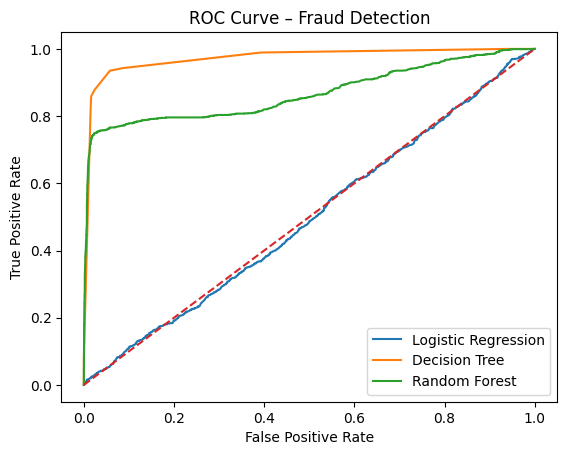

In [3]:


import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


df_train = pd.read_csv(r"C:\Users\Mahesh\OneDrive\Desktop\codesoft\fraudTrain.csv")

print("Original dataset shape:", df_train.shape)
print(df_train['is_fraud'].value_counts())


fraud = df_train[df_train['is_fraud'] == 1]
legit = df_train[df_train['is_fraud'] == 0].sample(n=50000, random_state=42)

df = pd.concat([fraud, legit])

print("\nSampled dataset shape:", df.shape)
print(df['is_fraud'].value_counts())


y = df['is_fraud']

X = df.drop(columns=[
    'is_fraud',
    'trans_date_trans_time',
    'first','last','street','city','state',
    'zip','job','dob','trans_num'
])


X = pd.get_dummies(X, drop_first=True)

# ------------------------------------------
# 5. TRAIN–TEST SPLIT
# ------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


lr = LogisticRegression(class_weight='balanced', max_iter=300)
lr.fit(X_train, y_train)

lr_probs = lr.predict_proba(X_test)[:,1]
lr_pred  = lr.predict(X_test)

print("\nLOGISTIC REGRESSION")
print(confusion_matrix(y_test, lr_pred))
print(classification_report(y_test, lr_pred))
print("ROC-AUC:", roc_auc_score(y_test, lr_probs))


dt = DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=42)
dt.fit(X_train, y_train)

dt_probs = dt.predict_proba(X_test)[:,1]
dt_pred  = dt.predict(X_test)

print("\nDECISION TREE")
print(confusion_matrix(y_test, dt_pred))
print(classification_report(y_test, dt_pred))
print("ROC-AUC:", roc_auc_score(y_test, dt_probs))


rf = RandomForestClassifier(
    n_estimators=20,
    max_depth=7,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

rf_probs = rf.predict_proba(X_test)[:,1]
rf_pred  = rf.predict(X_test)

print("\nRANDOM FOREST")
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))
print("ROC-AUC:", roc_auc_score(y_test, rf_probs))


fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs)
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)

plt.figure()
plt.plot(fpr_lr, tpr_lr, label="Logistic Regression")
plt.plot(fpr_dt, tpr_dt, label="Decision Tree")
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Fraud Detection")
plt.legend()
plt.show()
